In [40]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [41]:
#Utility functions

def show_images(images):
    n = int(np.ceil(np.sqrt(len(images))))
    fig = plt.figure(figsize=(n, n))
    gs = gridspec.GridSpec(n, n)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)
        
def read_img_patches(path,name):
    patches = []
    for i in range(130):
        img = Image.open(path+'normal_patches/'+name+'-'+str(i)+'.png')
        patches.append(np.array(img))
    return patches

In [42]:
#Global
path = '../../work/slides/ICIAR2018_BACH_Challenge/Photos/Normal/'

In [45]:
#Read patches from one image
name = 'n020'
patches = read_img_patches(path,name)
len(patches)

130

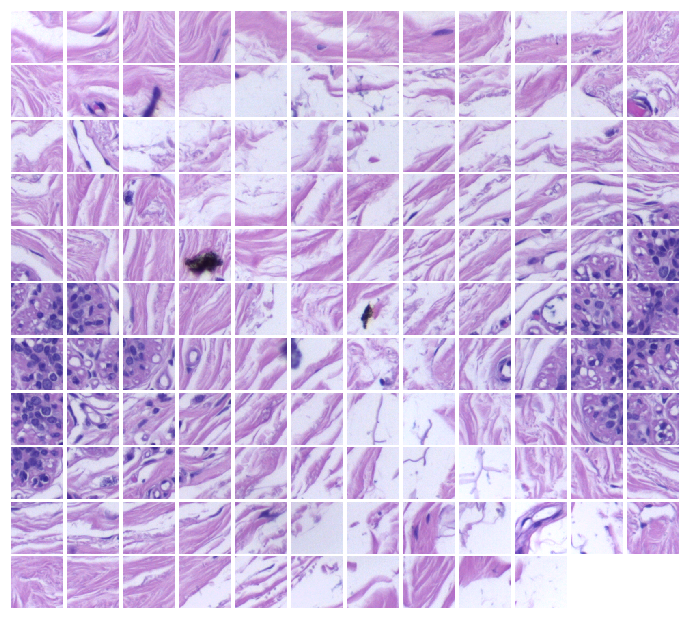

In [46]:
show_images(patches)